# Examples using the ```mBLLL()``` class


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## create some network

First I want to  create some sort of quick SBM network for the example.

/Users/Gneiss/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


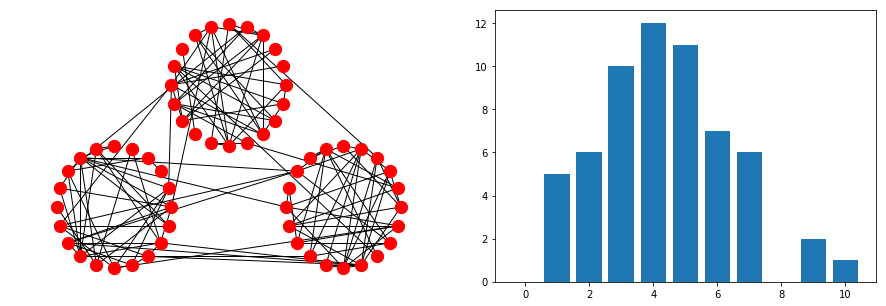

In [2]:
szes=np.array([20,20,20])
#create p matrix with expected 4 intraclass connections per node, 4 expected connections between classes
pmat=[[4/szes[i]  if i==j else 4/szes[i]/szes[j] for i in range(3)] for j in range(3)]

g1 = nx.stochastic_block_model(sizes=szes, p=pmat)
while nx.degree_histogram(g1)[0] > 0:
    g1 = nx.stochastic_block_model(sizes=szes, p=pmat)
lay1 = nx.circular_layout([i for i in range(20)], center=np.array([0,0]))
lay2 = nx.circular_layout([i for i in range(20,40)], center=np.array([2,2]))
lay3 = nx.circular_layout([i for i in range(40,60)], center=np.array([4,0]))
lay = {**lay1, **lay2, **lay3}
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
nx.draw(g1, pos=lay, node_size=150)
plt.subplot(1,2,2)
plt.bar(np.arange(0,len(nx.degree_histogram(g1))), nx.degree_histogram(g1))
plt.show()

## Using the ```mBLLL()``` class:

### import the class from the file mBLLL.py

In [3]:
from mBLLL import *

In [4]:
my_algo = mBLLL(n_agents=50, network_nx=g1, cover_ranges=1)

In [5]:
np.unique(my_algo.agents_pos[0]).size

50

### initialize with chosen positions and coverage range

We instantiate the mBLLL algo, by feeding it the network ```g1```, specifying two starting positions for the agents, and specifying the coverage ranges. In this case, we specify that the cover ranges is meant to be a constant and not the parameter of a poisson distribution.

In [6]:
my_algo = mBLLL(starting_positions=np.array([2,3]), network_nx=g1, cover_ranges=1, cover_ranges_distr="const")

### List the attributes

In [7]:
my_algo.__dict__

{'n_agents': 2,
 'network_nx': <networkx.classes.graph.Graph at 0x1069a8f60>,
 'n_nodes': 60,
 'random_state': 42,
 'timestamp': [],
 'agents_pos': [array([2, 3])],
 'cover_ranges': [1, 1],
 'coverages': [array([2, 3]), array([3, 2, 7, 8])],
 'potentials': [4]}

### Access the attributes:

In [8]:
my_algo.agents_pos

[array([2, 3])]

In [9]:
my_algo.potentials

[4]

### Make one cycle of the mBLLL algo, "step by step".

One cycle of the mBLLL algo is in two phases, after (possibly randomly) selecting an agent:  
1. the (attempted) movement of the agent, by calling ```.step()``` method.  
2. the (attempted) infection of neighbors, by calling ```.infect()``` method.  

We start with the movement:

In [10]:
my_algo.step(agent=0)

We can see the new position of the agents added to the list:

In [11]:
my_algo.agents_pos

[array([2, 3]), array([2, 3])]

We then attempt infection:

In [12]:
my_algo.infect(agent=0, prob=0.2, cover_ranges=1, cover_ranges_distr="const")

We can now see the new positions of the new agents:

In [13]:
my_algo.n_agents

2

In [14]:
my_algo.agents_pos

[array([2, 3]), array([2, 3])]

After a cycle is completed, we need to add the new potential to the list of potentials:

In [15]:
my_algo.add_potentials()

In [16]:
my_algo.potentials

[4, 4]

### Make one cycle of the mBLLL algo all at once.

These two phases are executed at once by the ```.run_mBLLL()``` method.

In [17]:
#instantiate algo
my_algo = mBLLL(starting_positions=np.array([2,3]), network_nx=g1, cover_ranges=1, cover_ranges_distr="const")
#run 1 cycle
my_algo.run_mBLLL(t_steps=1, prob=0.2, cover_ranges=1, cover_ranges_distr="const")

Let's access attributes:

In [18]:
my_algo.n_agents

4

In [19]:
my_algo.agents_pos

[array([2, 3]), array([3, 3, 3, 8])]

In [20]:
my_algo.potentials

[4, 7]

### Run 100 steps with allowing multiple agents on the same node:

In [21]:
my_algo.run_mBLLL(t_steps=100, prob=0.2, cover_ranges=1, cover_ranges_distr="const")

Text(0, 0.5, 'n_agents')

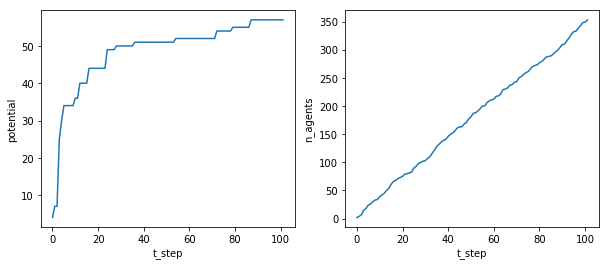

In [22]:
plt.figure(figsize=(10,4))
#plot potentials
plt.subplot(1,2,1)
plt.plot(my_algo.potentials)
plt.xlabel("t_step")
plt.ylabel("potential")
#plot n_agents
plt.subplot(1,2,2)
plt.plot([pos.size for pos in my_algo.agents_pos])
plt.xlabel("t_step")
plt.ylabel("n_agents")



### Run 100 steps without allowing multiple agents on the same node:

In [23]:
my_algo = mBLLL(starting_positions=np.array([2,3]), network_nx=g1, cover_ranges=1, cover_ranges_distr="const")
my_algo.run_mBLLL(t_steps=100, prob=0.2, cover_ranges=1, cover_ranges_distr="const", ghosts=False)

Text(0, 0.5, 'n_agents')

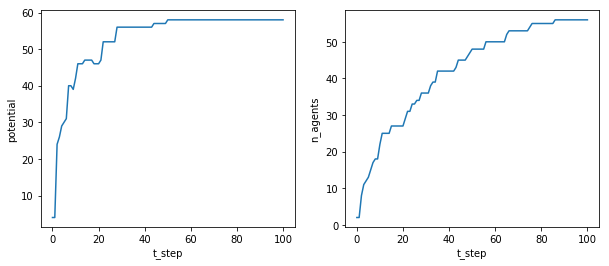

In [24]:
plt.figure(figsize=(10,4))
#plot potentials
plt.subplot(1,2,1)
plt.plot(my_algo.potentials)
plt.xlabel("t_step")
plt.ylabel("potential")
#plot n_agents
plt.subplot(1,2,2)
plt.plot([pos.size for pos in my_algo.agents_pos])
plt.xlabel("t_step")
plt.ylabel("n_agents")



### Run 5 steps with allowing multiple agents on the same node, and with defining a timestep as the activation of _all_ agents in random order

In [25]:
my_algo = mBLLL(starting_positions=np.array([2,3]), network_nx=g1, cover_ranges=1, cover_ranges_distr="const")
my_algo.run_mBLLL(t_steps=5, prob=0.2, cover_ranges=1, cover_ranges_distr="const", step_size="all", ghosts=True)

Text(0, 0.5, 'n_agents')

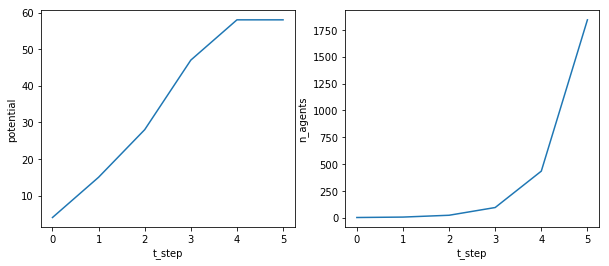

In [26]:
plt.figure(figsize=(10,4))
#get indices of ends of steps
indices = np.concatenate((np.array([0]), np.where(np.diff(my_algo.timestamp) == 1)[0]+1, np.array([len(my_algo.timestamp)-1])))
#plot potentials
plt.subplot(1,2,1)
plt.plot([my_algo.potentials[i] for i in indices])
plt.xlabel("t_step")
plt.ylabel("potential")
#plot n_agents
plt.subplot(1,2,2)
plt.plot([pos.size for pos in [my_algo.agents_pos[i] for i in indices]])
plt.xlabel("t_step")
plt.ylabel("n_agents")

### Run 5 steps without allowing multiple agents on the same node, and with defining a timestep as the activation of _all_ agents in random order

In [27]:
my_algo = mBLLL(starting_positions=np.array([2,3]), network_nx=g1, cover_ranges=1, cover_ranges_distr="const")
my_algo.run_mBLLL(t_steps=5, prob=0.2, cover_ranges=1, cover_ranges_distr="const", step_size="all", ghosts=False)

Text(0, 0.5, 'n_agents')

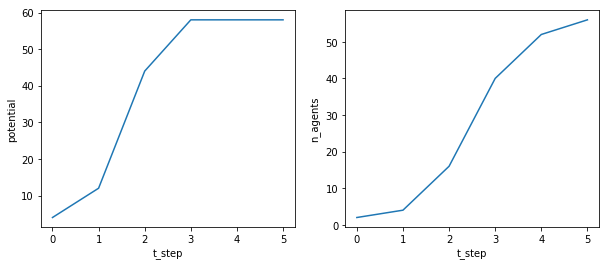

In [28]:
plt.figure(figsize=(10,4))
#get indices of ends of steps
indices = np.concatenate((np.array([0]), np.where(np.diff(my_algo.timestamp) == 1)[0]+1, np.array([len(my_algo.timestamp)-1])))
#plot potentials
plt.subplot(1,2,1)
plt.plot([my_algo.potentials[i] for i in indices])
plt.xlabel("t_step")
plt.ylabel("potential")
#plot n_agents
plt.subplot(1,2,2)
plt.plot([pos.size for pos in [my_algo.agents_pos[i] for i in indices]])
plt.xlabel("t_step")
plt.ylabel("n_agents")

### see last positions of agents

In [29]:
my_algo.agents_pos[-1]

array([ 2, 13, 49, 31, 30,  6,  7,  9, 16,  4, 47, 15, 51, 55,  8, 23, 39,
       27, 34, 38, 46, 57, 58, 18,  0,  5, 14, 48, 50, 19, 21, 22, 43, 41,
       44,  1, 17, 12, 56, 59, 42, 36, 35, 26, 54, 32, 29, 37, 10, 52, 45,
       53, 11, 20,  3, 40])

### get coverage of an agent in position 18

In [30]:
my_algo.get_coverage(agent_position=18, network_nx=my_algo.network_nx, cover_range=1)

array([18,  0,  4,  6, 12, 13, 17, 56])

### save data

In [31]:
my_algo.save_pickle("./demo_results.p")

### load data

In [32]:
demo_results = pickle.load(open("./demo_results.p", "rb"))

Text(0, 0.5, 'n_agents')

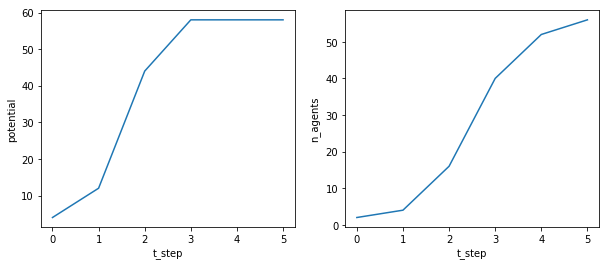

In [33]:
plt.figure(figsize=(10,4))
#get indices of ends of steps
indices = np.concatenate((np.array([0]), np.where(np.diff(demo_results.timestamp) == 1)[0]+1, np.array([len(demo_results.timestamp)-1])))
#plot potentials
plt.subplot(1,2,1)
plt.plot([demo_results.potentials[i] for i in indices])
plt.xlabel("t_step")
plt.ylabel("potential")
#plot n_agents
plt.subplot(1,2,2)
plt.plot([pos.size for pos in [demo_results.agents_pos[i] for i in indices]])
plt.xlabel("t_step")
plt.ylabel("n_agents")

### more help

Access help pages of specific methods of the mBLLL class:

In [34]:
help(mBLLL.run_mBLLL) #man page of the method BLLL.run()

Help on function run_mBLLL in module mBLLL:

run_mBLLL(self, t_steps=100, temperature=1, prob=0.5, cover_ranges=2, cover_ranges_distr='const', step_size='one', ghosts=True)
    Method to run t_steps of the mBLLL algo.
    
    Run the mBLLL algo for t_steps.
    
    Args:
        t_steps (int): number of steps for the simulation.
        temperature (float): temperature of the simulation (see ref).
        prob (float): probability of a covered node to be infected
        cover_ranges (int): cover range of the new agents. depending on cover_ranges_distr, either will be the cover ranges or the new agents, or a parameter for a distribution from which the new cover ranges will be sampled
        cover_ranges_distr (str): if "const", all new agents have cover range equal to cover_ranges. if "poisson", cover ranges for each new agent are sampled from a poisson distribution with rate=cover_ranges 
        step_size (str): if "one", only one (random) agent is activated in each step, if "all"

Access full help page of the class:

In [35]:
help(mBLLL) #complete man page of the class BLLL

Help on class mBLLL in module mBLLL:

class mBLLL(builtins.object)
 |  Template class for mBLLL algo, a modification of: 
 |  Yazıcıoğlu, A.Y., Egerstedt, M., and Shamma, J.S. (2013). A Game Theoretic Approach to Distributed Coverage of Graphs by Heterogeneous Mobile Agents. IFAC Proceedings Volumes 46, 309–315.
 |  
 |  Attributes:
 |      agents_pos (list[numpy.array]): list of 1d-arrays of agent positions (matrix indices), of size (n_agents)
 |      potentials (list[int]): list of potentials 
 |      
 |  Parameters:
 |      n_agents (int): number of agents. Corrected to number size of starting_positions if starting_positions is specified.
 |      starting_positions (np.array): 1-d array of starting positions. 
 |          If None, starting positions are selected at random. 
 |      cover_ranges (int or list): cover range of the agents. either an int to be applied to all agent, 
 |          or a list of ints representing the cover ranges for each agent
 |      cover_ranges_distr (st